In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_covid = pd.read_csv('/Users/omkarsadekar/Documents/NEU Study Material/NEU Study Material/Healthcare Data and Applications/Project Datasets/Cleaned_data/merged_wastewater_covid_data.csv')

In [11]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5979 entries, 0 to 5978
Data columns (total 37 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Tester                                     5979 non-null   object 
 1   Site type                                  5979 non-null   object 
 2   Name of Sampling Location                  5979 non-null   object 
 3   7 day average of SARS-CoV-2 concentration  5979 non-null   float64
 4   Number of samples in the last 7 days       5979 non-null   int64  
 5   SARS-CoV-2 Detected                        5979 non-null   object 
 6   Sample collection date                     5979 non-null   object 
 7   Units (measuring concentration)            5979 non-null   object 
 8   City of sampling location                  5979 non-null   object 
 9   State of sampling location                 5979 non-null   object 
 10  County of sampling locat

In [12]:
#Dropping Null values
df_covid.dropna(inplace=True)

In [13]:
#Handling Data Types
import pandas as pd

# date columns to datetime
date_columns = ['Week Start Date', 'Week End Date']
df_covid[date_columns] = df_covid[date_columns].apply(pd.to_datetime)

In [17]:
df_covid.columns

Index(['Tester', 'Site type', 'Name of Sampling Location',
       '7 day average of SARS-CoV-2 concentration',
       'Number of samples in the last 7 days', 'SARS-CoV-2 Detected',
       'Sample collection date', 'Units (measuring concentration)',
       'City of sampling location', 'State of sampling location',
       'County of sampling location', 'Date data last updated',
       'Week Start Date', 'Week End Date', 'Group', 'Subgroup',
       'Estimated population', 'Percent of the population', 'Week case rate',
       'Cumulative cases', 'Cumulative case rate', 'Deaths during this week',
       'Week death rate', 'Cumulative deaths', 'Cumulative death rate',
       'Confirmed deaths', 'Confirmed cases', 'County', 'Population',
       'Cases during this week_y', 'Cumulative confirmed cases',
       'Cumulative tests', 'Tests during the week', 'Positive tests the week',
       'Week percent positivity', 'Weekly case rate', 'Weekly testing rate'],
      dtype='object')

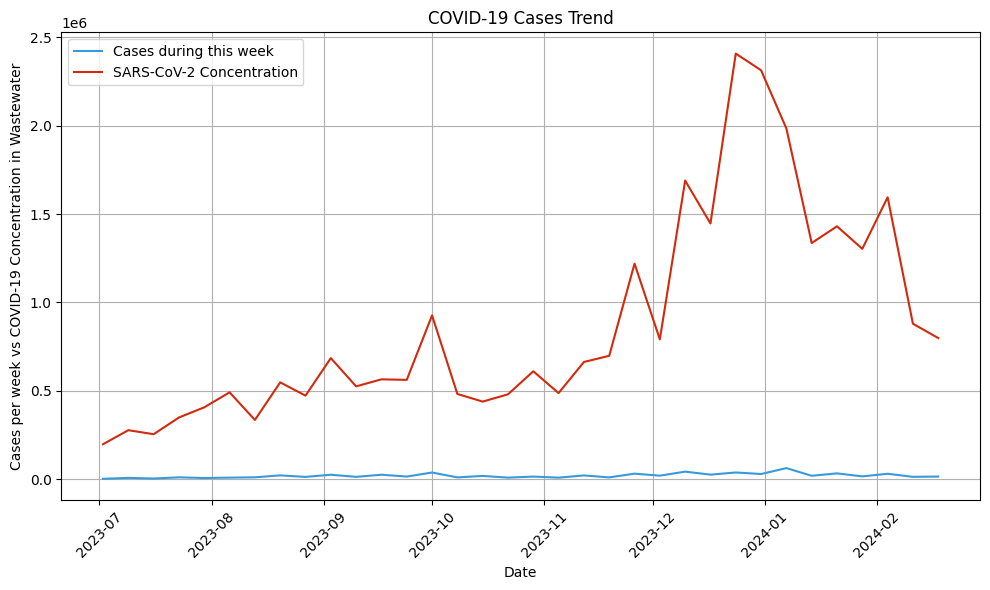

In [25]:
# Replace values 1-4 with 2 in the 'Cases during this week' column
df_covid['Cases during this week_y'] = df_covid['Cases during this week_y'].replace(["1-4"], 2)
# Convert 'Cases during this week' column to float
df_covid['Cases during this week_y'] = df_covid['Cases during this week_y'].astype(float)
trend_data = df_covid.groupby('Week Start Date').agg({
    'Cases during this week_y': 'sum',
    '7 day average of SARS-CoV-2 concentration': 'mean',
}).reset_index()

# Plot the trend visualization
plt.figure(figsize=(10, 6))
plt.plot(trend_data['Week Start Date'], trend_data['Cases during this week_y'], color='#379BDB',label='Cases during this week')
plt.plot(trend_data['Week Start Date'], trend_data['7 day average of SARS-CoV-2 concentration'], color='#D22A0D', label='SARS-CoV-2 Concentration')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Cases per week vs COVID-19 Concentration in Wastewater')
plt.title('COVID-19 Cases Trend')

# Add legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


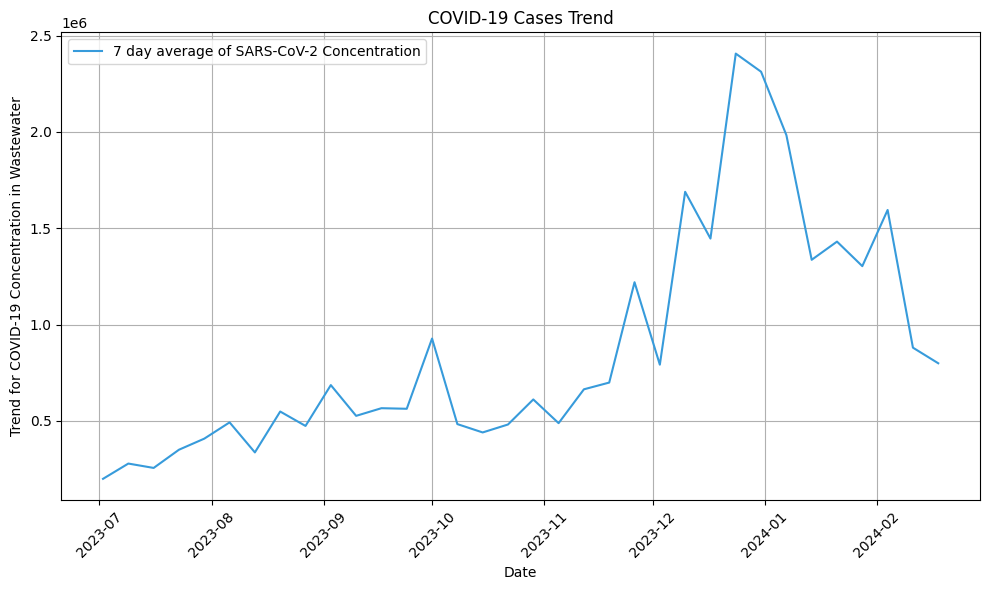

In [30]:
ww_data = df_covid.groupby('Week Start Date').agg({
    '7 day average of SARS-CoV-2 concentration': 'mean',
}).reset_index()
# Plot the trend visualization
plt.figure(figsize=(10, 6))
plt.plot(ww_data['Week Start Date'], ww_data['7 day average of SARS-CoV-2 concentration'], color='#379BDB',label='7 day average of SARS-CoV-2 Concentration')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Trend for COVID-19 Concentration in Wastewater')
plt.title('COVID-19 Cases Trend')

# Add legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()
